In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics import confusion_matrix
from sklearn import preprocessing    
le = preprocessing.LabelEncoder()

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
train_df = pd.read_csv('../input/spaceship-titanic/train.csv')
test_df  = pd.read_csv('../input/spaceship-titanic/test.csv')

In [3]:
train_df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
train_df.shape

(8693, 14)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [7]:
n = train_df.nunique(axis=0)  
print("No.of.unique values in each column :\n", n)

No.of.unique values in each column :
 PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64


<AxesSubplot:xlabel='Age', ylabel='Count'>

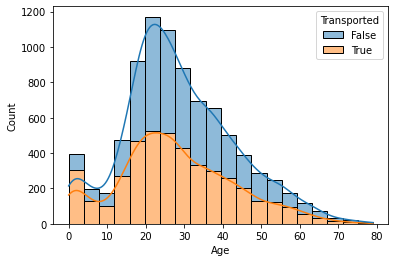

In [8]:
sns.histplot(x='Age', hue='Transported', data=train_df, bins=20, multiple="stack", kde=True)

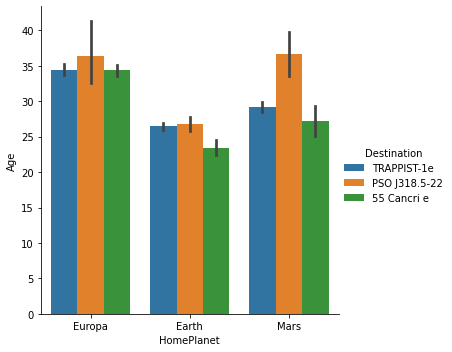

In [9]:
sns.catplot(y="Age", x="HomePlanet", hue="Destination", kind="bar", data=train_df)

<AxesSubplot:xlabel='HomePlanet', ylabel='count'>

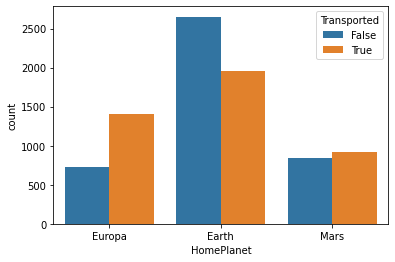

In [10]:
sns.countplot(x="HomePlanet",hue="Transported", data=train_df)

<AxesSubplot:xlabel='Transported', ylabel='count'>

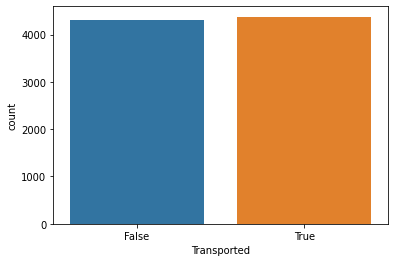

In [11]:
sns.countplot(x="Transported", data=train_df)

<AxesSubplot:xlabel='Destination', ylabel='count'>

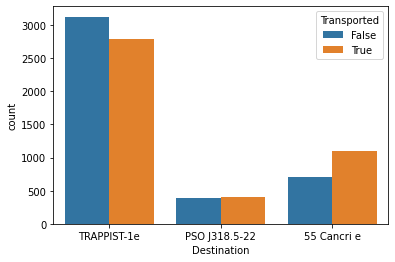

In [12]:
sns.countplot(x="Destination",hue="Transported", data=train_df)

<AxesSubplot:xlabel='HomePlanet', ylabel='Count'>

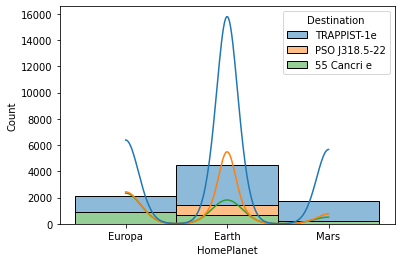

In [13]:
sns.histplot(x="HomePlanet",hue="Destination", data=train_df, multiple="stack", kde=True)

<AxesSubplot:xlabel='CryoSleep', ylabel='count'>

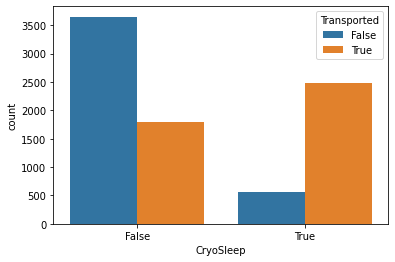

In [14]:
sns.countplot(x="CryoSleep",hue="Transported", data=train_df)

<AxesSubplot:xlabel='VIP', ylabel='count'>

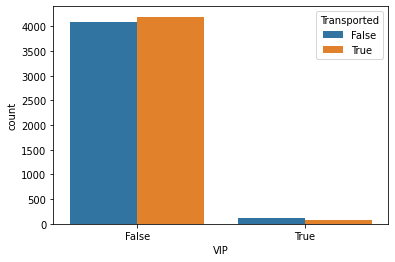

In [15]:
sns.countplot(x="VIP",hue="Transported", data=train_df)

<AxesSubplot:xlabel='Age', ylabel='Count'>

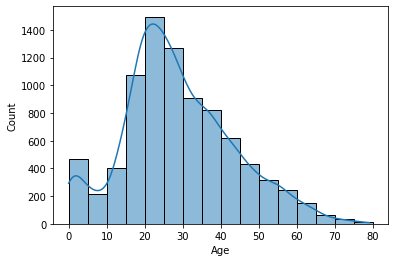

In [16]:
sns.histplot(data=train_df, x="Age", binwidth=5,multiple="stack", kde=True)

<AxesSubplot:xlabel='Age', ylabel='RoomService'>

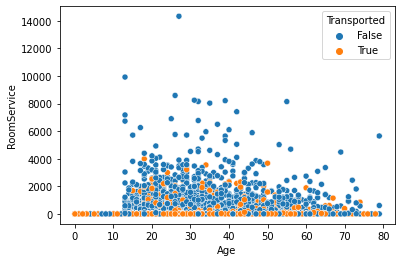

In [17]:
sns.scatterplot(data=train_df, x='Age', y='RoomService',hue="Transported",legend="full")

<AxesSubplot:xlabel='Age', ylabel='Spa'>

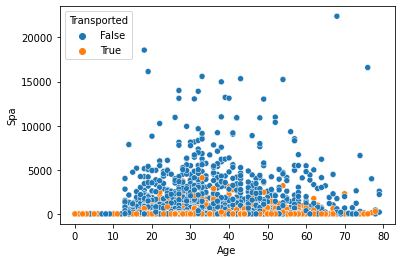

In [18]:
sns.scatterplot(data=train_df, x='Age', y='Spa',hue="Transported",legend="full")

<AxesSubplot:xlabel='Age', ylabel='VRDeck'>

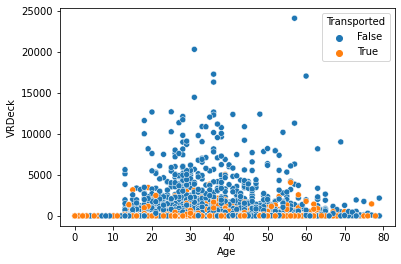

In [19]:
sns.scatterplot(data=train_df, x='Age', y='VRDeck',hue="Transported",legend="full")

<AxesSubplot:xlabel='FoodCourt'>

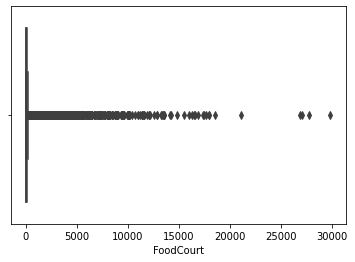

In [20]:
sns.boxplot(x='FoodCourt',data=train_df)

In [21]:
train_df.loc[train_df['FoodCourt'] > 20000, 'FoodCourt'] = train_df.loc[train_df['FoodCourt'] < 20000, 'FoodCourt'].mean()

<AxesSubplot:xlabel='Transported', ylabel='ShoppingMall'>

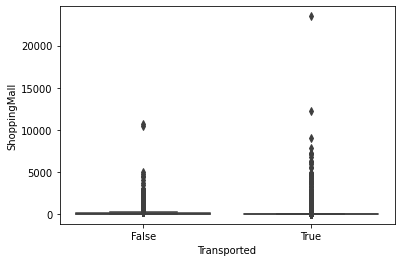

In [22]:
sns.boxplot(x='Transported', y='ShoppingMall',data=train_df)

In [23]:
train_df.loc[train_df['ShoppingMall'] > 10000, 'ShoppingMall'] = train_df.loc[train_df['ShoppingMall'] < 10000, 'ShoppingMall'].mean()

<AxesSubplot:xlabel='Spa'>

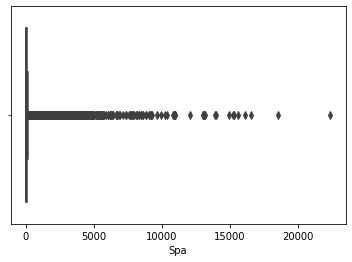

In [24]:
sns.boxplot(x='Spa',data=train_df)

In [25]:
train_df.loc[train_df['Spa'] > 20000, 'Spa'] = train_df.loc[train_df['Spa'] < 20000, 'Spa'].mean()

<AxesSubplot:xlabel='VRDeck'>

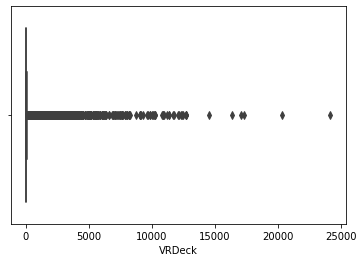

In [26]:
sns.boxplot(x='VRDeck',data=train_df)

In [27]:
train_df.loc[train_df['VRDeck'] > 20000, 'VRDeck'] = train_df.loc[train_df['VRDeck'] < 20000, 'VRDeck'].mean()

<AxesSubplot:xlabel='RoomService'>

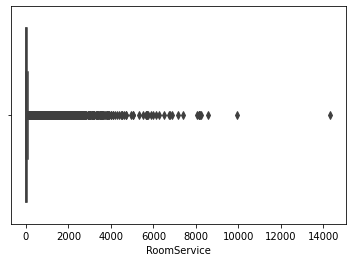

In [28]:
sns.boxplot(x='RoomService',data=train_df)

In [29]:
train_df.loc[train_df['RoomService'] > 10000, 'RoomService'] = train_df.loc[train_df['RoomService'] < 10000, 'RoomService'].mean()

In [30]:
train_df['HomePlanet']= train_df['HomePlanet'].fillna('Earth')
test_df['HomePlanet']= test_df['HomePlanet'].fillna('Earth')

In [31]:
train_df['Destination']= train_df['Destination'].fillna('TRAPPIST-1e')
test_df['Destination']= test_df['Destination'].fillna('TRAPPIST-1e')

In [32]:
train_df['Destination'] = train_df['Destination'].str.replace("TRAPPIST-1e","TRAPPIST")
train_df['Destination'] = train_df['Destination'].str.replace("55 Cancri e","Cancri")
train_df['Destination'] = train_df['Destination'].str.replace("PSO J318.5-22","PSO")
#easy names xD
test_df['Destination'] = test_df['Destination'].str.replace("TRAPPIST-1e","TRAPPIST")
test_df['Destination'] = test_df['Destination'].str.replace("55 Cancri e","Cancri")
test_df['Destination'] = test_df['Destination'].str.replace("PSO J318.5-22","PSO")

In [33]:
train_df['CryoSleep']= train_df['CryoSleep'].fillna(False)
test_df['CryoSleep']= test_df['CryoSleep'].fillna(False)

In [34]:
train_df['VIP']= train_df['VIP'].fillna(False)
test_df['VIP']= test_df['VIP'].fillna(False)

In [35]:
train_df['Age'].mean()

28.82793046746535

In [36]:
train_df['Age']= train_df['Age'].fillna(29)
test_df['Age']= test_df['Age'].fillna(29)

In [37]:
train_df['Spa']= train_df['Spa'].fillna(train_df['Spa'].mean())
test_df['Spa']= test_df['Spa'].fillna(test_df['Spa'].mean())

In [38]:
train_df['FoodCourt']= train_df['FoodCourt'].fillna(train_df['FoodCourt'].mean())
test_df['FoodCourt']= test_df['FoodCourt'].fillna(test_df['FoodCourt'].mean())

In [39]:
train_df['ShoppingMall']= train_df['ShoppingMall'].fillna(train_df['ShoppingMall'].mean())
test_df['ShoppingMall']= test_df['ShoppingMall'].fillna(test_df['ShoppingMall'].mean())

In [40]:
train_df['RoomService']= train_df['RoomService'].fillna(train_df['RoomService'].mean())
test_df['RoomService']= test_df['RoomService'].fillna(test_df['RoomService'].mean())

In [41]:
train_df['VRDeck']= train_df['VRDeck'].fillna(train_df['VRDeck'].mean())
test_df['VRDeck']= test_df['VRDeck'].fillna(test_df['VRDeck'].mean())

In [42]:
def converting_column(df,col,convertType):
    if convertType=='OHE':
        one_hot = pd.get_dummies(df[col],prefix=col)
        df = df.drop(col,axis = 1)
        df = df.join(one_hot)
        return df
    else:
        df[col] = le.fit_transform(df[col])
        return df

In [43]:
train_df = converting_column(train_df,'HomePlanet','OHE')
test_df = converting_column(test_df,'HomePlanet','OHE')

In [44]:
train_df = converting_column(train_df,'Destination','FTR')
test_df = converting_column(test_df,'Destination','FTR')

In [45]:
train_df = converting_column(train_df,'CryoSleep','FTR')
test_df = converting_column(test_df,'CryoSleep','FTR')

In [46]:
train_df = converting_column(train_df,'VIP','FTR')
test_df = converting_column(test_df,'VIP','FTR')

In [47]:
def CabinExtract(df):
    df[['Deck', 'Num', 'Side']] = df['Cabin'].str.split('/', expand=True)    
    df['Num'] = df['Num'].astype(float)
    
    df['Deck']= df['Deck'].fillna('G')
    df['Num']= df['Num'].fillna(df['Num'].mean())
    df['Side']= df['Side'].fillna('S')
    
             
    df['Deck'] = le.fit_transform(df['Deck'])
    df['Side'] = le.fit_transform(df['Side'])
    
    return df

In [48]:
train_df = CabinExtract(train_df)
test_df = CabinExtract(test_df)

In [49]:
def findFamilyId(df):
    df[['Passenger_Group_Id', 'Passenger_Num']] = df['PassengerId'].str.split('_', expand=True)
    df['Passenger_Group_Id'] = df['Passenger_Group_Id'].astype(int)
    df['Passenger_Num'] = df['Passenger_Num'].astype(int)
    df['Passenger_Cnt'] = df.groupby('Passenger_Group_Id')['Passenger_Num'].transform('max')
    return df

In [50]:
train_df = findFamilyId(train_df)
test_df = findFamilyId(test_df)

In [51]:
train_df = train_df.drop(['Cabin','Name'], axis=1)
test_df = test_df.drop(['Cabin','Name'], axis=1)

In [52]:
train_df = train_df.drop(['PassengerId'], axis=1)

In [53]:
train_df = train_df.drop(['Passenger_Num','Passenger_Group_Id','VIP','Deck','HomePlanet_Mars'], axis=1)
test_df = test_df.drop(['Passenger_Num','Passenger_Group_Id','VIP','Deck','HomePlanet_Mars'], axis=1)

In [54]:
train_df['Under15'] = train_df['Age'].apply(lambda x: 1 if x < 15 else 0)
test_df['Under15'] = test_df['Age'].apply(lambda x: 1 if x < 15 else 0)
train_df = train_df.drop(['Age'], axis=1)
test_df = test_df.drop(['Age'], axis=1)

In [55]:
train_df.head(5)

,CryoSleep,Destination,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,Num,Side,Passenger_Cnt,Under15
0,0,2,0.0,0.0,0.0,0.0,0.0,False,0,1,0.0,0,1,0
1,0,2,109.0,9.0,25.0,549.0,44.0,True,1,0,0.0,1,1,0
2,0,2,43.0,3576.0,0.0,6715.0,49.0,False,0,1,0.0,1,2,0
3,0,2,0.0,1283.0,371.0,3329.0,193.0,False,0,1,0.0,1,2,0
4,0,2,303.0,70.0,151.0,565.0,2.0,True,1,0,1.0,1,1,0


In [56]:
X = train_df.drop("Transported", axis=1)
y = train_df["Transported"]

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [57]:
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, y_train.shape,X_valid.shape, y_valid.shape , X_test.shape

((6954, 13), (6954,), (1739, 13), (1739,), (4277, 13))

In [58]:
# params = {
# 'n_estimators': range(1, 10),
# 'max_depth': range(3, 9),
# 'learning_rate': [.2, .3, .4, .5, .6],
# 'colsample_bytree': [.7, .8, .9, 1]
# }
# xgb = XGBClassifier()
# g_search = GridSearchCV(estimator = xgb, param_grid = params,
# cv = 3, n_jobs = -1, verbose = 0, return_train_score=True)
# g_search.fit(X_train, y_train)
# print(g_search.best_params_)

In [59]:
xgb_model = XGBClassifier(colsample_bytree=0.8, n_estimators= 7,learning_rate=0.5,subsample= 0.6, min_child_weight=1, max_depth=4, objective='binary:logistic')
mod = xgb_model.fit(X_train, y_train,eval_metric='logloss')

print("Performance on train data:", mod.score(X_train, y_train))

y_pred_v = xgb_model.predict(X_valid)

cm = confusion_matrix(y_valid, y_pred_v) 
print ("Confusion Matrix : \n", cm)

Performance on train data: 0.8055795225769341
Confusion Matrix : 
 [[659 204]
 [164 712]]


In [60]:
y_pred_v

array([1, 1, 0, ..., 1, 0, 0])

In [61]:
y_pred_x=mod.predict(X_test)


In [62]:
PassengerId = test_df['PassengerId']
submission = pd.DataFrame({'PassengerId':PassengerId,'Transported':y_pred_x})

In [63]:
submission.to_csv('submission.csv',index=False)